In [221]:
## Importing required libraries

import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Question-1

Tensorflow is a high-level python's library which is used for implememnting/developing machine learning models or performing other machine learning tasks. It's offers both low level and high level API's. It is a free and open-source library developed by Google's brain team.

On the other hand, keras is an open source library based on python which provides high level API's for neural networks. It is more specific as compared to tensorflow. It is essentially a neural network library. It works on top of frameworks like tensorflow. Keras is more user-friendly than tensorflow because it is built in python.

### Question-2

There are 2 types of models in Keras.

They are sequential model and the functional model.

Keras is a neural network framework and sequential model of Keras helps in ordering or arranging the layers within a model.
 Like adding input layer, hidden layers and output layers of a network. It is quite simple and makes working with layers easier for users. It is used for stacking the layers of a neural network.
 
A simple use case of how sequential model is used is shown below:

model = Sequential()

model.add(Input(shape = (784,)))

model.add(Dense(256, activation = 'relu')) 

model.add(Dense(10, activation = 'softmax'))

First, we define the model, then we add the input layer as shown above, then we can add hidden layer if we want with specified number of neurons in it. Finally, we add the output layer with the activation function that we want according to the output.
As we can see, it makes easier to add all the layers according to the user's preference. Users can flexibly alter the layer parameters.

### Question-3

Losses in deep learning/machine learning are nothing but the difference between the actual value and the predicted value. They are the measure of the model's prediction. The closer the value of loss to 0, the better is it. 

For instance, Mean squared loss is given by the square of the difference between the label and the prediction:
$$ MSE  = (observation - prediction(x))2 $$
$$ MSE = (y - y')2 $$

How losses are responsible for model learning:

The model with a given set of weights is used to make predictions and the error for those predictions is calculated. Error is observed value - predicted value. 

We use optimization algorithms like gradient descent to minimize the error. , meaning the optimization algorithm is navigating down the gradient (or slope) of error. This way finally the error is reduced or eliminated and therefore the model has learnt and is ready to make predictions. This is how model learns.






references: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

### Question-4

In [222]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [223]:
x_train.shape

(60000, 28, 28)

In [224]:
#shape of 0th image.

x_train[0].shape

(28, 28)

### Viewing the image

In [225]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [226]:
# The actual output i.e 500th element is 3 which in turn is dress 

class_names[y_train[500]]

'Dress'

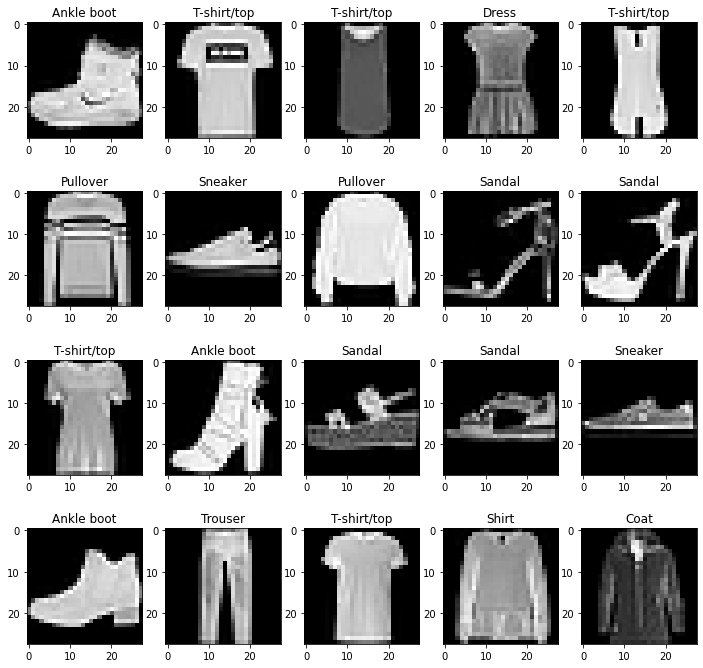

In [227]:
plt.figure(figsize=(12,15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

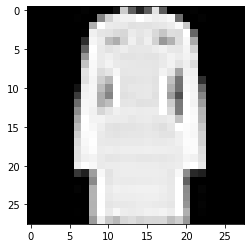

In [228]:
# Here, just as an illustration, we are taking random sample element 500 from the total 60,000 set of images
plt.imshow(x_train[500].reshape(28,28), cmap = 'gray')
plt.show()

In [229]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [230]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Prepare the dataset

In [231]:
# prepairing x before performing operations on it. -1 means automatically adjust the shape, 1 is number of channels i.e greyscale
# image. for RGB it would have been -1,28,28,3 instead of -1,28,28,1.

x_train = x_train.reshape(-1,28,28,1).astype('float')/255
x_test = x_test.reshape(-1,28,28,1).astype('float')/255


In [232]:
# We also need to change y because there can be any possibility of a given input to be from 0 to 9. 
# Hence, the columns will be 10 and the rows will be 60,000. So, we are one hot encoding y values.


y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [233]:
x_test.shape

(10000, 28, 28, 1)

In [234]:
y_train_ohe.shape

(60000, 10)

In [235]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [236]:
x_train[0].shape

(28, 28, 1)

In [237]:
y_train_ohe[0].shape

(10,)

In [238]:
y_train[0]  # ankle boot

9

In [239]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [240]:
#Finally checking the shapes before building the model

print(x_train.shape)
print(x_test.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


#### Model building

- Model Definition - Architecture of the network (# Hidden layers, # Units)
- Model Compilation - Loss functions, Accuracy Metrics
- Model Train - # Epochs 

In [241]:
#Model Definition
model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (5,5), strides = (1,1), padding = "same"))
model.add(Activation('relu')) # 28 by 28
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1))) # 14 by 14

model.add(Conv2D(filters=10, kernel_size = (5,5), strides = (1,1)))
model.add(Activation('relu')) # 28x28

model.add(Flatten())

# model.add(Dense(256, activation = 'relu')) # This is the hidden layer with 256 units/neurons and relu activation function

model.add(Dense(10, activation = 'softmax')) # Output with Softmax as multilabel, dense layer is any general neural network layer


In [242]:
#Compilation

model.compile(optimizer= Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
            metrics= ['accuracy'])



# RMSprop without specifying learning rate explicitly

# model.compile(optimizer='rmsprop',
#             loss='categorical_crossentropy',
#             metrics= ['accuracy'])

In [243]:
# Fitting the data

model.fit(x=x_train,
          y=y_train_ohe,
          batch_size = 10000,
          epochs = 10,
          validation_data = (x_test, y_test_ohe))

Epoch 1/10
6/6 [==============================] - 18s 3s/step - loss: 1.9364 - accuracy: 0.4088 - val_loss: 1.3866 - val_accuracy: 0.6759
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 1.0851 - accuracy: 0.7062 - val_loss: 0.8259 - val_accuracy: 0.7206
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 0.7469 - accuracy: 0.7398 - val_loss: 0.7078 - val_accuracy: 0.7465
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: 0.6686 - accuracy: 0.7606 - val_loss: 0.6526 - val_accuracy: 0.7665
Epoch 5/10
6/6 [==============================] - 17s 3s/step - loss: 0.6079 - accuracy: 0.7797 - val_loss: 0.5936 - val_accuracy: 0.7806
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 0.5545 - accuracy: 0.7988 - val_loss: 0.5545 - val_accuracy: 0.7978
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: 0.5271 - accuracy: 0.8122 - val_loss: 0.5323 - val_accuracy: 0.8073
Epoch 8/10
6/6 [==================

In [130]:
## model.history.history provides all the metrics

In [244]:
# Analyzing metrics

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

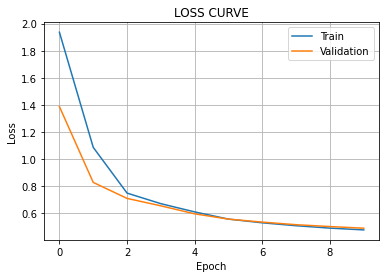

In [245]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

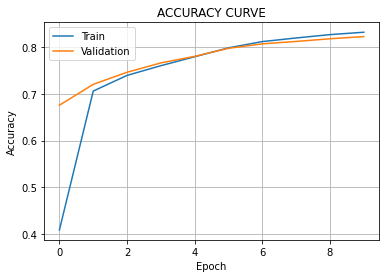

In [246]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [134]:
## Viewing the random image

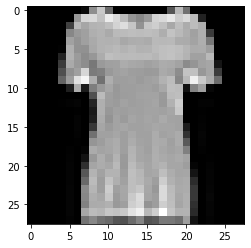

In [135]:
plt.imshow(x_train[10].reshape(28,28),cmap='gray')
plt.show()

## Predictions

In [137]:
preds= model.predict(x_test)
preds

313/313 [==============================] - 2s 5ms/step


array([[4.4581100e-07, 2.9910217e-09, 1.2741682e-06, ..., 1.9385915e-02,
        5.3520594e-04, 9.7560650e-01],
       [2.6043848e-04, 2.5846503e-09, 9.9208575e-01, ..., 1.7434045e-15,
        1.1559999e-07, 1.6997323e-10],
       [1.9829658e-06, 9.9999011e-01, 2.3374696e-08, ..., 1.0954569e-10,
        9.4387886e-10, 2.0819999e-12],
       ...,
       [3.9563090e-02, 1.8854446e-07, 1.7449541e-02, ..., 2.9424104e-05,
        7.2696024e-01, 7.6398595e-07],
       [4.0083586e-07, 9.9948382e-01, 1.7657293e-08, ..., 3.1675196e-08,
        1.1416589e-07, 2.9980491e-08],
       [6.4577052e-04, 2.7684977e-05, 1.6817141e-03, ..., 1.1889544e-01,
        4.2268373e-02, 2.2401363e-03]], dtype=float32)

In [138]:
## The output of this cell can be compared with the test data images shown in the next cell, the first element
# is 9, which in classes if we see is boot.

preds_final = np.argmax(preds, axis = 1) 

Here, we can see that for the 0th element, the element at 9th index has the masimum probablity, which means that the 0th value os most likely the Ankle Boot as it is the 9th element in class_names. That's why we are using argmax to get the index of element which has max value. It is important to note that as we are getting probablities in preds, so if we sum all of these values, we will always get 1.

In [139]:
preds[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
      dtype=float32)

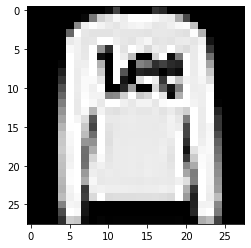

In [140]:
# Checking the 0th element of test_data which is labelled as 9, on comparison we can see our algorithm has given the right result.

plt.imshow(x_test[1],cmap='gray') 
plt.show()

In [141]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

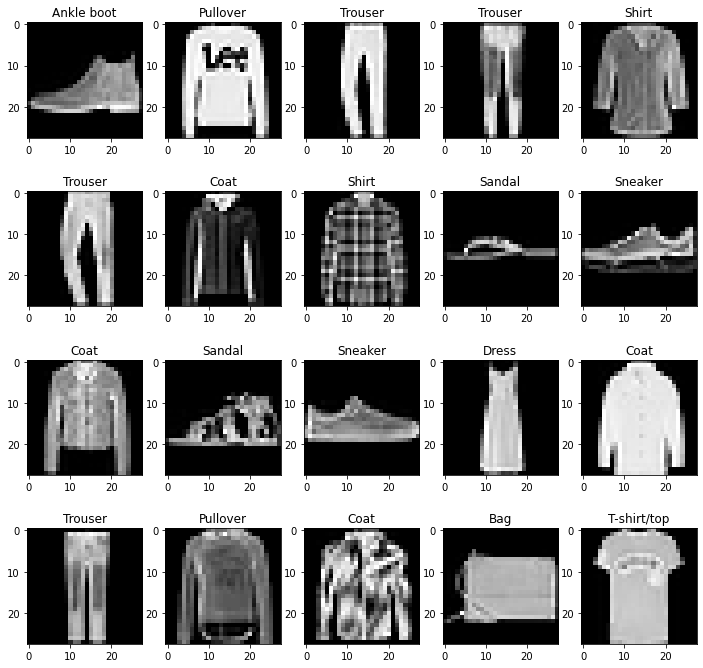

In [142]:
# test data images

plt.figure(figsize=(12,15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_test[i]])
plt.show()

## Part a):-

There are 2 main hidden layers that are required for this dataset. The first one is Convolution layer, second one is activation layer function and the 3rd one is maxpooling layer. Nevertheless, more convolution, activation and maxpooling layers can be added in order to improve the accuracy. Please note that adding more maxpooling layers will shrink the image size further. In question 4, I have used 4 hidden layers. In my opinion it is best as can be seen from the accuracy curve in question 4. Both the training as well as validation_set accuracy are quite high are have almost same values, same holds true for loss as well.

Below is an example of adding hidden layers:

model.add(Conv2D(filters = 10, kernel_size = (5,5), strides = (1,1), padding = "same"))

model.add(Activation('relu')) # 28 by 28

model.add(MaxPool2D(pool_size = (2,2), strides = (1,1))) # 14 by 14


model.add(Conv2D(filters=10, kernel_size = (5,5), strides = (1,1)))
model.add(Activation('relu')) # 28x28

## Part b):-

We generally, keep the total number of neurons per layers equal to the number of output classes. In our case, we have total 10 classes from 0 to 10.
So, 10 neurons per layer are optimum as we are getting quite high accuracy with them. But it is not fixed and we can change them

###  Checking performance of our model

In [143]:
pd.DataFrame(confusion_matrix(y_test, preds_final), index = class_names, columns = class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,854,1,19,28,5,3,85,0,5,0
Trouser,2,972,1,17,4,0,3,0,1,0
Pullover,17,1,824,7,79,0,70,0,2,0
Dress,21,10,12,895,25,0,35,0,2,0
Coat,1,1,52,37,826,0,82,0,1,0
Sandal,0,0,0,0,0,943,1,39,1,16
Shirt,148,1,79,22,88,0,658,0,4,0
Sneaker,0,0,0,0,0,12,0,960,0,28
Bag,6,1,7,8,7,2,22,6,940,1
Ankle boot,0,0,0,0,0,5,1,35,0,959


In [144]:
print(classification_report(y_test, preds_final))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.83      0.81      1000
           5       0.98      0.94      0.96      1000
           6       0.69      0.66      0.67      1000
           7       0.92      0.96      0.94      1000
           8       0.98      0.94      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Comparison of results

In [145]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': preds_final})
comp

,Actual,Predicted
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


## checking misclassification

In [146]:
# Rows where actual item was T-shirt/top but was misclassified as Pullover

comp.loc[(comp.Actual == 0) & (comp.Predicted == 2)]

,Actual,Predicted
454,0,2
681,0,2
1399,0,2
2628,0,2
2717,0,2
2953,0,2
3132,0,2
3484,0,2
3609,0,2
3953,0,2


### Question-5 Overfitting and Underfitting

Suppose, we have a given dataset, we divide the dataset into two parts, training data and the test data. So, we will fit the line to the data and calculate the error using linear regression. If the line fits the training data very well or in other words, if the training data error/bias is less, then it is called as overfitting. In overfitting, our model performs quite well on the training data but poorly on testing dataset. Bias is the training data error. Varaince is the test data error.

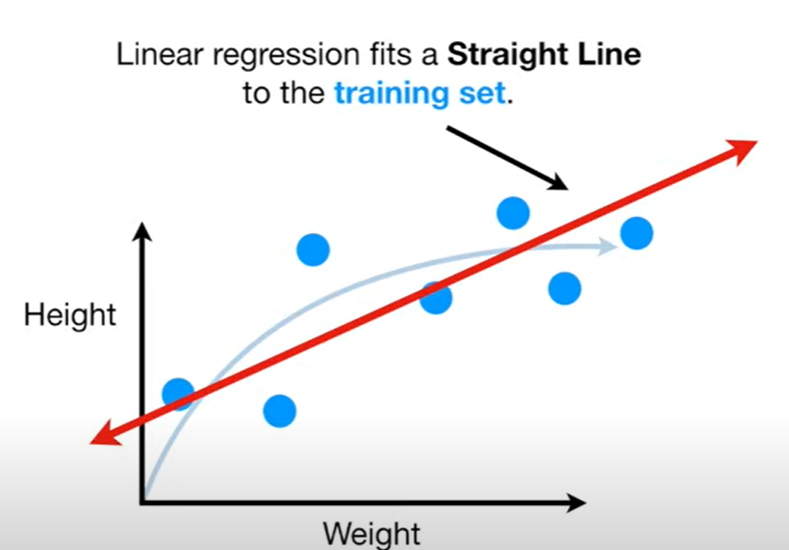

In contrast, underfitting refers to the situation where the accuracy for both the test data and the training data is less.
In it, we have high bias and high variance.  


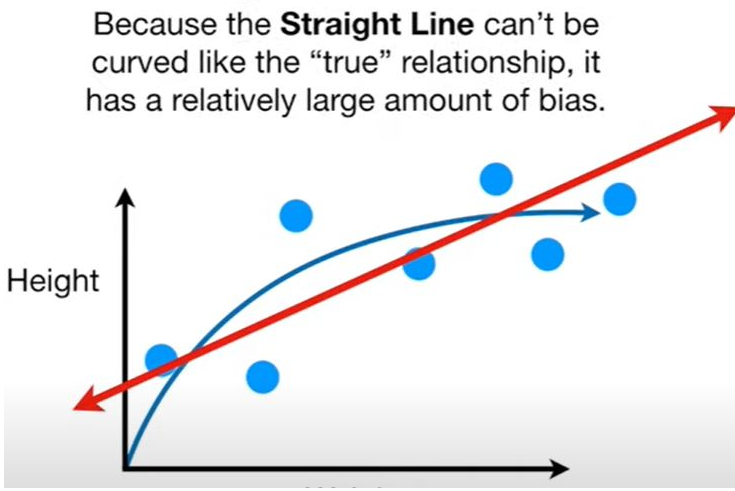

We always strive to find the best model which has lowest possible bias and variance.

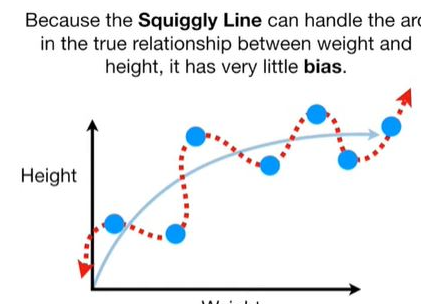


The overfitting can be measured/identified using validation metrics such as loss and accuracy. Low error rate and high variance in the dataset give us an indication of overfitting. In deep learning models like the one in question 5, if our validation loss/error is high and validation_accuracy is low, then our model is probably overfitting.

We can add dropout in our model to reduce accuracy which inturn reduces overfitting. If the accuracy is too high for the training data and not good for testing data, then we can conclude that the overiftting has occured.

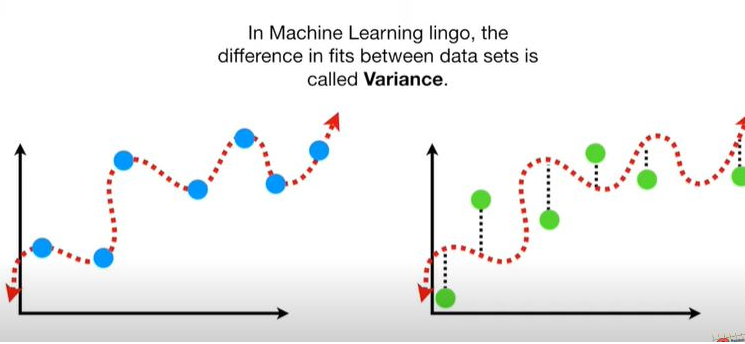

We can also, model.add(BatchNormalization()), dropout layer i.e model.add(Dropout(0.25)) and/or regularization if your model is overfitting, reduce learning rate, and increase number of epochs



reference:https://www.youtube.com/watch?v=EuBBz3bI-aA

### Question-6

One EPOCH is one complete forward pass of the data including both forward anad backward pass/one complete pass of complete input. This is known as Batch training/batch gradient descent. 

When we pass all the observations at once through the network and when we update the weights, update the error. This approach is faster. We take the average of error so you might not see massive correction.


There is a second variant, in which we take one observation and do one forward pass, update the weights. Then, we take the second observation and do one forward pass, update the weights and so on........ We keep on doing it for each data point/input(like 1st row, then updation, then another row and so on). It is called schostiac gradient descent approach.  This method converges faster, better chances of getting to minima as we are updating weights frequently. It is more receptive to error.


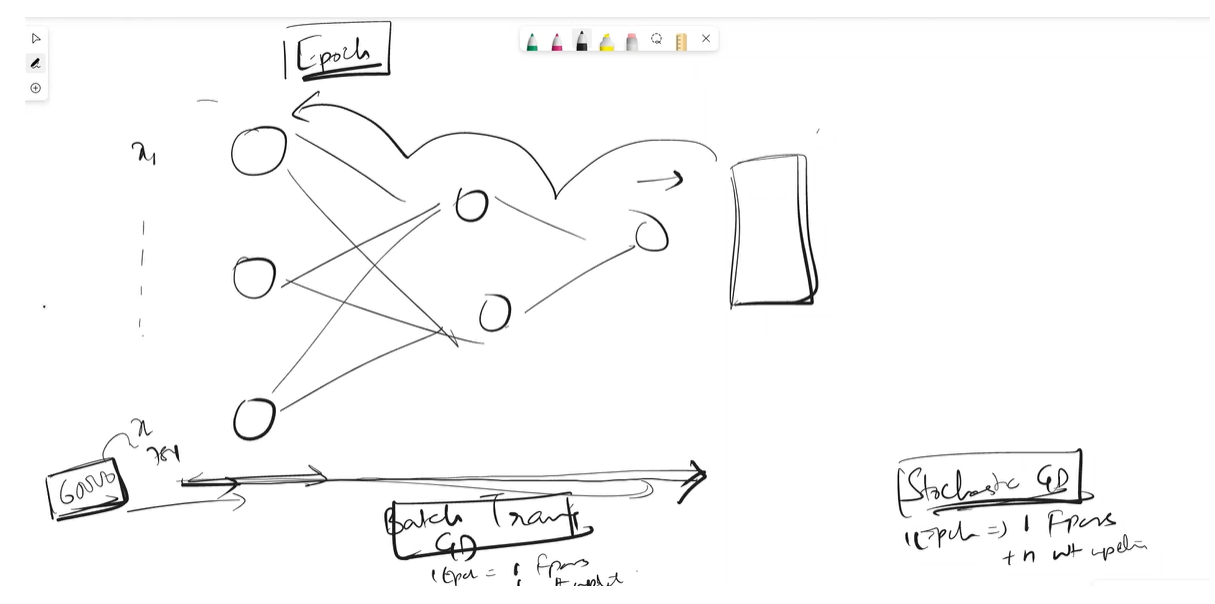



Both have their own set of pros and cons. So, a middle approach was adopted which is known as mini-batch gradient-descent

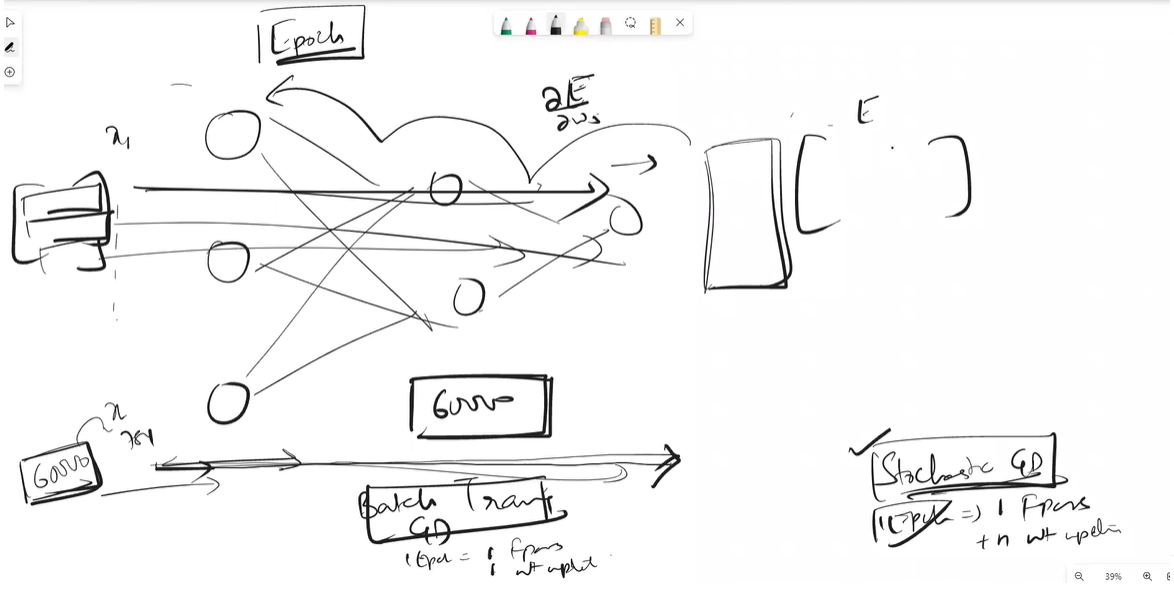


In this approach, we take batches. Like we take first batch, perform forward pass, compute the error and then update the weights. Then second batch and so on. Batch size specifies how many observations, rows you pass through the network in one single batch. For instance, say the batch size of 32 is taken and there are 60,000 total observations/rows. So, 60,000/32 will be the batch size i.e 1875(number of observations in 1 batch), which means in the first forward pass 1875 observations will be passed over to the network. Then another batch of 1875 observations for the next pass and then 1875 for the subsequent passes until all 60,000 observations are completed.

### Question-7

The worksheet has been added in the same folder with name question_7 sheet where all the metrics at different batch sizes have
been recorded.